In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [6]:
path=os.getcwd()

In [7]:
data=pd.read_csv(path+'/data/'+'20200605_211457_blacklivesmatter_tweets.csv')

In [8]:
data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,MukeCxddlex,NaN,NaN,155,301,19513,2014-10-27 09:44:12,2020-06-05 12:03:00,0,⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[{'text': 'PoliceBrutality', 'indices': [231, ..."
1,bbober21,NaN,NaN,2,0,2,2020-06-05 05:57:34,2020-06-05 12:02:59,53,They'll never say #WhiteLivesMatter because on...,"[{'text': 'WhiteLivesMatter', 'indices': [37, ..."
2,dumbkittie,☆she/her☆20☆sub☆anti e-frog activist☆,minors dni,208,1479,16787,2018-11-04 02:53:44,2020-06-05 12:02:59,85,[WARNING GRAPHIC!] LAPD shoots “less than leth...,[]
3,algoriffix,Algoriffix is a startup company based in Stock...,"Stockholm, Sweden",25,6,3,2020-04-07 17:52:03,2020-06-05 12:02:59,1,"#MichaelJackson Stop #Racism - ""It don't matte...","[{'text': 'MichaelJackson', 'indices': [15, 30..."
4,tonihenderson,#covid-19 inspired #NewArmchairActivist /WWll ...,"Newbury, England",802,224,4174,2009-06-07 19:56:00,2020-06-05 12:02:59,1304,POLICE OFFICER TELLS PROUD BOYS TO HIDE INSIDE...,[]


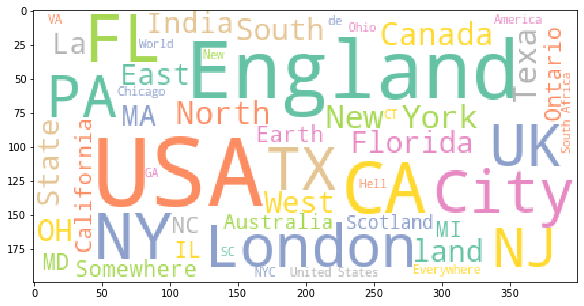

In [11]:
#!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(str(locate) for locate in data.location.unique())
wordcloud = WordCloud(max_words=50,colormap='Set2', background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.show()

In [27]:
import string

def removePunctuation(strs):
    remove = string.punctuation
    remove = remove.replace("-", "") # don't remove hyphens
    remove = remove.replace("@", "") # don't remove hyphens
    remove = remove.replace("!", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern

    h = re.sub(pattern, " ", strs) 
    return h

def replace(strs):
    strs = strs.replace('\n','')
    strs = strs.replace('\t','')
    strs = strs.replace('rt','')
    return strs

def tokenize(strs):
    tokenizer = TweetTokenizer()
    nltk_tokens = tokenizer.tokenize(strs)
    return nltk_tokens

def removeAkunHastagsEmoji(tokens):
    regexp = re.compile(r'@[a-z]') #Hapus @
    filtered = filter(lambda i: not regexp.search(i), tokens)
    filtered = [i for i in tokens if not regexp.search(i)]
    regexp = re.compile(r'#[a-z0-9]') #Hapus #
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    regexp = re.compile(r'[😂👏🙄👇🤣😅🙄🙈😀☝🙏👆😐👍🤔😊😉😌😊😉✌🤤😭😃🦄💪😔❤😑👉😆😁🙃💐⚡😎👌💯💃🎶👀☀💞😤👊✊😔🛀🙋👼👥😍✊😃💗👎🤦😁😞😡⚠️⚠️⚠️]') #Hapus Emoji
    filtered = filter(lambda i: not regexp.search(i), filtered)
    filtered = [i for i in filtered if not regexp.search(i)]
    return filtered

In [28]:
#PREPROCESSING
import nltk
import re
nltk.download("punkt")
data = data
data['text2'] = [i.lower() for i in data.text.astype(str)] #lowertext
data['text2'] = [re.sub(r'http.*', '', i) for i in data.text2] #remove link
data['text2'] = [re.sub(r'<.*?>', '', i) for i in data.text2] #remove html
data['text2'] = [removePunctuation(i) for i in data.text2] #remove punctuation
data['text2'] = [replace(j) for j in data.text] #replace \n \t rt
data['token'] = [nltk.word_tokenize(i) for i in data.text2] #tokenize string
data['token'] = [removeAkunHastagsEmoji(i) for i in data.token] #remove akun, hastags, emoji

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irfanfadhullah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
data.head(1)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,text2,token,clean_token
0,MukeCxddlex,NaN,NaN,155,301,19513,2014-10-27 09:44:12,2020-06-05 12:03:00,0,⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[{'text': 'PoliceBrutality', 'indices': [231, ...",⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[SHARE, !, He, pushed, the, poor, defenceless,...","[SHARE, !, He, pushed, poor, defenceless, old,..."


In [30]:
nltk.download('stopwords')
stopwords=set(nltk.corpus.stopwords.words())
def clean(text2):
    res=[]
    for word in text2:
        if word not in stopwords:
            res.append(word)
    return res

data['clean_token']=[clean(i) for i in data.token]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfanfadhullah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data.head(1)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,text2,token,clean_token
0,MukeCxddlex,NaN,NaN,155,301,19513,2014-10-27 09:44:12,2020-06-05 12:03:00,0,⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[{'text': 'PoliceBrutality', 'indices': [231, ...",⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[SHARE, !, He, pushed, the, poor, defenceless,...","[SHARE, !, He, pushed, poor, defenceless, old,..."


In [32]:
#Steamming
ps=nltk.PorterStemmer()
data['clean_token']= [ps.stem(tmp) for tmp in data.clean_token.astype(str)]

In [33]:
data.head(1)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,text2,token,clean_token
0,MukeCxddlex,NaN,NaN,155,301,19513,2014-10-27 09:44:12,2020-06-05 12:03:00,0,⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[{'text': 'PoliceBrutality', 'indices': [231, ...",⚠️⚠️PLEASE SHARE ! He pushed the poor defencel...,"[SHARE, !, He, pushed, the, poor, defenceless,...","['share', '!', 'he', 'pushed', 'poor', 'defenc..."


## Topik Modeling

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
data_vektor = vectorizer.fit_transform(data['clean_token'].fillna(' '))
lda = LatentDirichletAllocation(n_components = 7, random_state = 42)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=7, random_state=42)

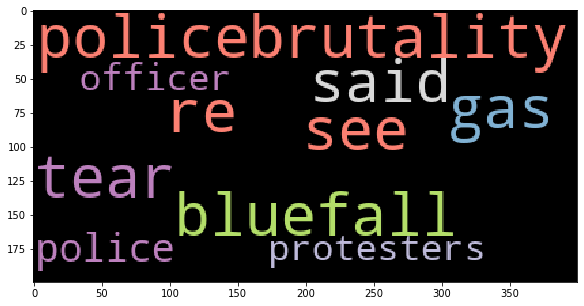

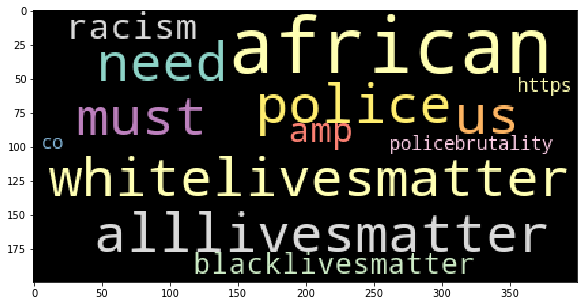

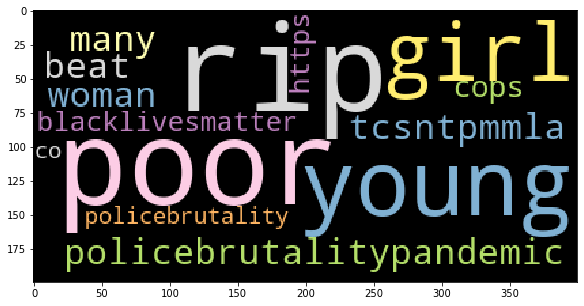

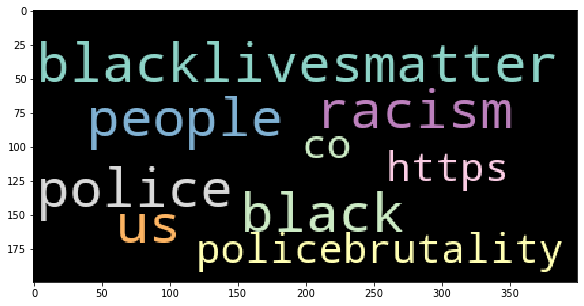

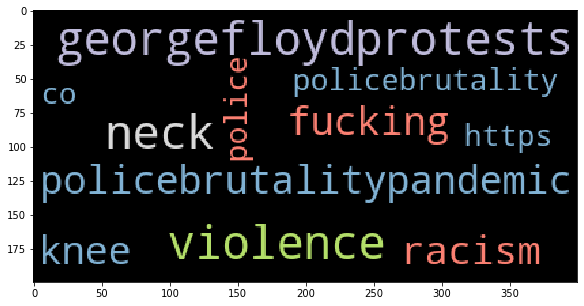

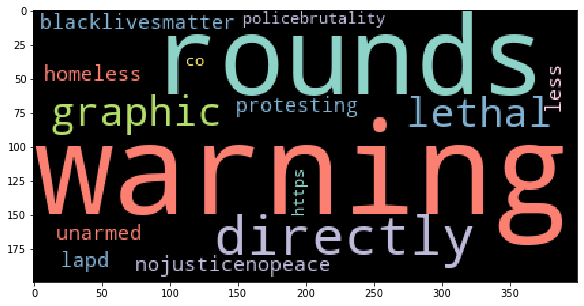

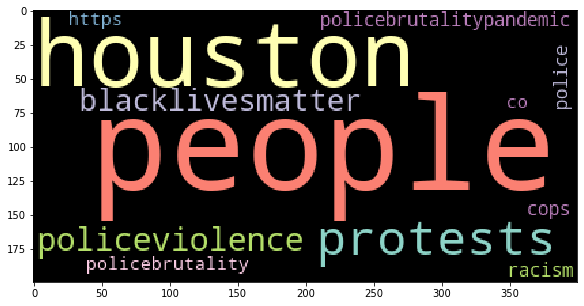

In [36]:
for index, topic in enumerate(lda.components_):
    tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.show()

## Refferences

### https://medium.com/bisa-ai/text-analysis-and-topic-modelling-covid-19-33b025f4eeb6
### https://medium.com/@leowgriffin/scraping-tweets-with-tweepy-python-59413046e788
### https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1